In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full_df = pd.read_csv(open("/Users/RyanHaver/Projects/cryptoStrategies/full_data.csv"))
full_df['open_time'] = pd.to_datetime(full_df['open_time'], unit='ms')
full_df.set_index('open_time', inplace=True)
full_df.drop(columns=['close_time', 'count', 'taker_buy_base_volume', 'taker_buy_quote_volume', 'quote_volume'], inplace=True)
full_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

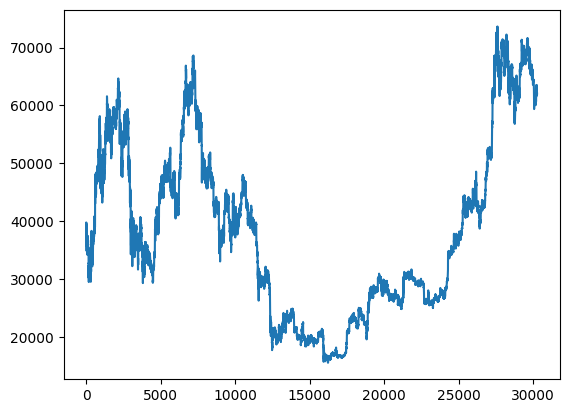

In [3]:
plt.plot(full_df['Close'].to_list())
plt.show()

In [4]:
window_size = 10
# Does using open and close prices actually give me any more information?
full_df['close_change'] = full_df['Close'].diff()
full_df['open_change'] = full_df['Open'].diff()
full_df['positive_close'] = full_df['close_change'] > 0
full_df['positive_open'] = full_df['open_change'] > 0
close_previous_window = full_df['positive_close'].rolling(window=window_size, min_periods=window_size).sum().shift(1-window_size) == window_size
open_previous_window = full_df['positive_open'].rolling(window=window_size, min_periods=window_size).sum().shift(1-window_size) == window_size
full_df['trend_close'] = close_previous_window
full_df['trend_open'] = open_previous_window
full_df.reset_index(inplace=True)
full_df

,open_time,Open,High,Low,Close,Volume,close_change,open_change,positive_close,positive_open,trend_close,trend_open
0,2021-01-14 14:00:00,38950.00,39761.78,38950.00,39714.52,0.025650,NaN,NaN,False,False,False,False
1,2021-01-14 15:00:00,39595.51,40067.90,39433.56,39433.56,0.211447,-280.96,645.51,False,True,False,False
2,2021-01-14 16:00:00,39538.49,39538.49,39237.10,39237.10,0.156347,-196.46,-57.02,False,False,False,False
3,2021-01-14 17:00:00,39674.92,39674.92,39430.00,39430.00,0.006008,192.90,136.43,True,True,False,False
4,2021-01-14 18:00:00,39430.00,39430.00,39430.00,39430.00,0.020030,0.00,-244.92,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
30255,2024-07-02 19:00:00,62248.02,62300.91,61822.28,61834.01,1.454780,-414.53,187.04,False,True,False,False
30256,2024-07-02 20:00:00,61908.90,62005.64,61800.00,61927.91,0.357090,93.90,-339.12,True,False,False,False
30257,2024-07-02 21:00:00,61928.58,62048.22,61881.17,61950.01,0.825720,22.10,19.68,True,True,False,False
30258,2024-07-02 22:00:00,61950.02,62063.77,61940.00,62000.66,0.229810,50.65,21.44,True,True,False,False


Text(0.5, 1.0, 'Values with Uptrends Highlighted')

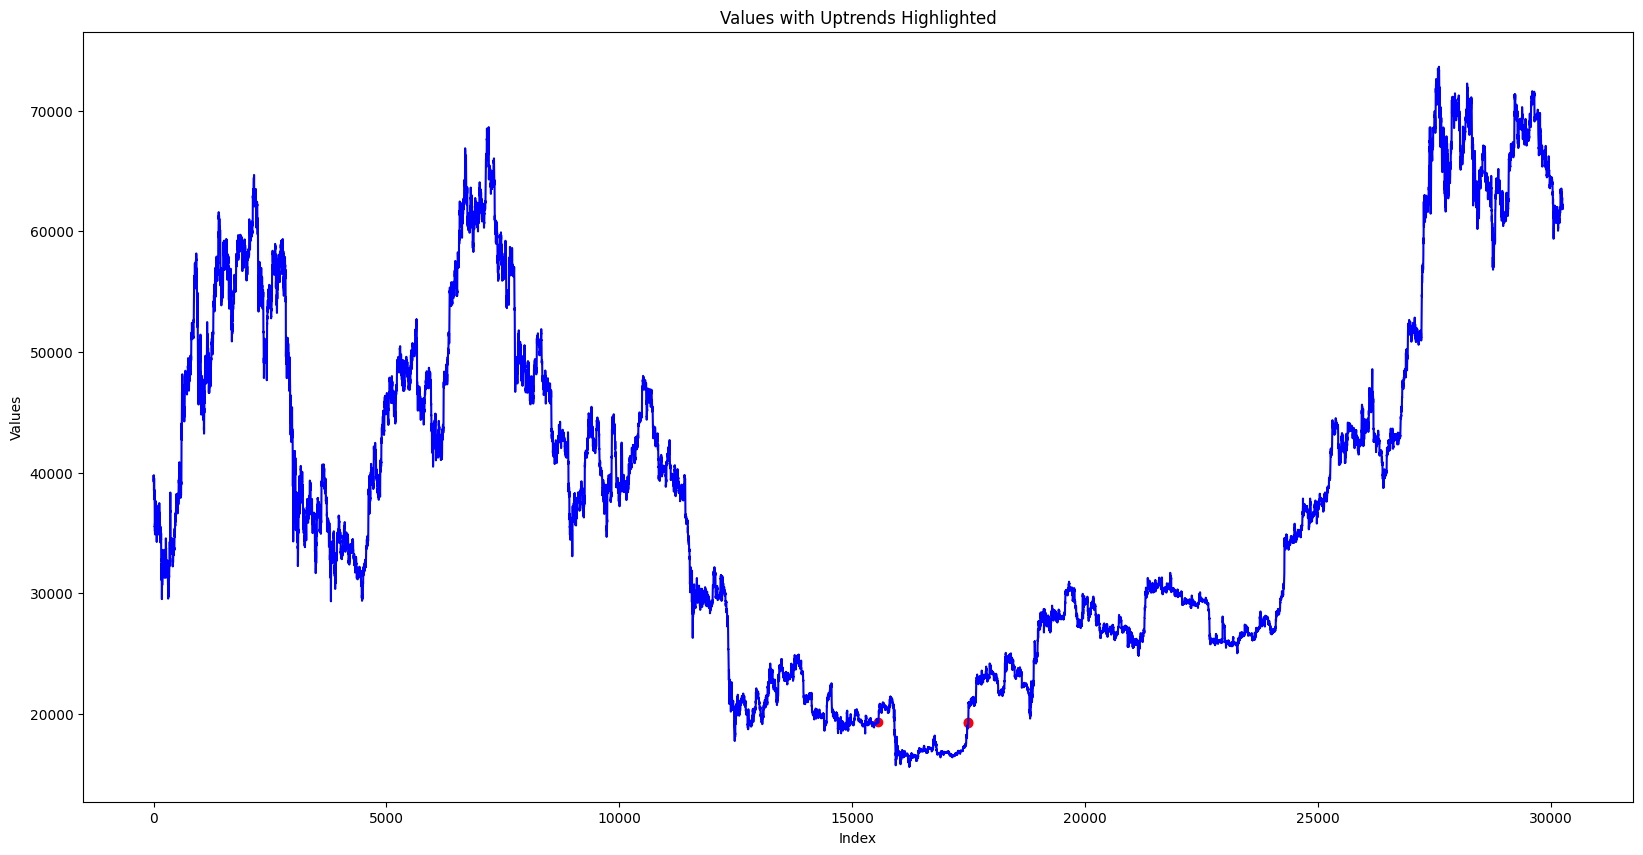

In [5]:
# Plot the entire series
plt.figure(figsize=(20,10))
plt.plot(full_df['Close'], label='Values', color='blue')
# Overlay uptrends in a different color
uptrend_indices = full_df[full_df['trend_close'] == True].index
plt.scatter(uptrend_indices, full_df['Close'].loc[uptrend_indices], color='red', label='Uptrend')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Values with Uptrends Highlighted')


Simple trend detection with a 10-window lookback period, since we this is the 5m chart, its a 50 minute lookback

What happens if we use a longer lookback? Like 1 month, and calculate our momentum using the method described in "Quantitative Momentum"
$$
(\prod_{n=1}^{5*12*30} 1+return(n-1,n))-1
$$

This will give us the gross returns for the time series

In [6]:
full_df['close_change_pct'] = full_df['Close'].pct_change()*100

In [19]:
full_df

,open_time,Open,High,Low,Close,Volume,close_change,open_change,positive_close,positive_open,trend_close,trend_open,close_change_pct
0,2021-01-14 14:00:00,38950.00,39761.78,38950.00,39714.52,0.025650,NaN,NaN,False,False,False,False,NaN
1,2021-01-14 15:00:00,39595.51,40067.90,39433.56,39433.56,0.211447,-280.96,645.51,False,True,False,False,-0.707449
2,2021-01-14 16:00:00,39538.49,39538.49,39237.10,39237.10,0.156347,-196.46,-57.02,False,False,False,False,-0.498205
3,2021-01-14 17:00:00,39674.92,39674.92,39430.00,39430.00,0.006008,192.90,136.43,True,True,False,False,0.491627
4,2021-01-14 18:00:00,39430.00,39430.00,39430.00,39430.00,0.020030,0.00,-244.92,False,False,False,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30255,2024-07-02 19:00:00,62248.02,62300.91,61822.28,61834.01,1.454780,-414.53,187.04,False,True,False,False,-0.665927
30256,2024-07-02 20:00:00,61908.90,62005.64,61800.00,61927.91,0.357090,93.90,-339.12,True,False,False,False,0.151858
30257,2024-07-02 21:00:00,61928.58,62048.22,61881.17,61950.01,0.825720,22.10,19.68,True,True,False,False,0.035687
30258,2024-07-02 22:00:00,61950.02,62063.77,61940.00,62000.66,0.229810,50.65,21.44,True,True,False,False,0.081759


## Old section from 5m candles

In [14]:
larger_window = full_df['close_change_pct'].rolling(window=18, min_periods=18).apply(np.prod)

In [48]:
full_df['index'] = full_df.index

In [36]:
full_df

,index,open_time,open,high,low,close,volume,quote_volume,close_change,open_change,positive_close,positive_open,trend_close,trend_open,close_change_pct
0,0,1569369600000,8548.70,8637.76,8548.70,8628.42,0.202100,1737.614200,NaN,NaN,False,False,False,False,NaN
1,1,1569369900000,8638.78,8646.56,8625.83,8625.83,0.018900,163.175600,-2.59,90.08,False,True,False,False,-0.000300
2,2,1569370200000,8588.22,8591.65,8588.22,8591.65,0.033354,286.501900,-34.18,-50.56,False,False,False,False,-0.003963
3,3,1569370500000,8605.05,8631.37,8595.12,8631.37,0.521172,4490.021600,39.72,16.83,True,True,False,False,0.004623
4,4,1569370800000,8631.37,8631.37,8631.37,8631.37,0.000000,0.000000,0.00,26.32,False,True,False,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399248,399248,1689302100000,25301.01,25468.59,25101.01,25101.01,2.758760,69555.219855,-200.00,-198.99,False,False,False,False,-0.007905
399249,399249,1689302400000,25101.01,26459.02,25001.00,25196.00,6.245420,158555.791356,94.99,-200.00,True,False,False,False,0.003784
399250,399250,1689302700000,25241.24,25493.65,25001.02,25115.01,2.081300,52313.419493,-80.99,140.23,False,True,False,False,-0.003214
399251,399251,1689303000000,25199.29,25241.24,25000.00,25025.00,2.830070,70992.712009,-90.01,-41.95,False,False,False,False,-0.003584


In [37]:
# Used to turn the 5m candles into 1 hour
agg_dict = {
    'open_time': 'first',
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}

In [38]:
hour_close_df = full_df.groupby(full_df['index']//12).agg(agg_dict)

In [39]:
hour_close_df['pct_change'] = hour_close_df['close'].pct_change()*100
hour_close_df

,open_time,open,high,low,close,volume,pct_change
index,,,,,,,
0,1569369600000,8548.70,8722.15,8548.70,8722.15,2.592735,NaN
1,1569373200000,8722.15,8722.15,8672.94,8700.93,0.518017,-0.243289
2,1569376800000,8703.38,8723.64,8612.28,8612.28,0.768822,-1.018857
3,1569380400000,8633.96,8638.05,8581.19,8581.19,0.718755,-0.360996
4,1569384000000,8596.48,8596.48,8416.85,8488.30,1.040230,-1.082484
...,...,...,...,...,...,...,...
33267,1689288900000,25620.70,26499.39,25475.00,25950.01,7.781300,1.298692
33268,1689292500000,25950.00,26014.12,25475.00,25520.00,7.027680,-1.657071
33269,1689296100000,25520.00,25931.41,25500.00,25649.75,6.448080,0.508425


In [40]:
hour_close_df.to_csv("hour_candles.csv")

## Updated section

In [8]:
momentum_score = (full_df['close_change_pct']+1).rolling(window=24).apply(np.prod)-1

The momentum score is the percent returns in the time period

In [22]:
momentum_score[momentum_score>100]

45       1644.401216
46        305.707060
47        539.793674
191       241.244116
198       105.289481
            ...     
29102     104.745497
29103     109.225365
29106     104.879899
29107     168.724379
29108     168.952223
Name: close_change_pct, Length: 129, dtype: float64

Text(0.5, 1.0, 'Values with Momentum')

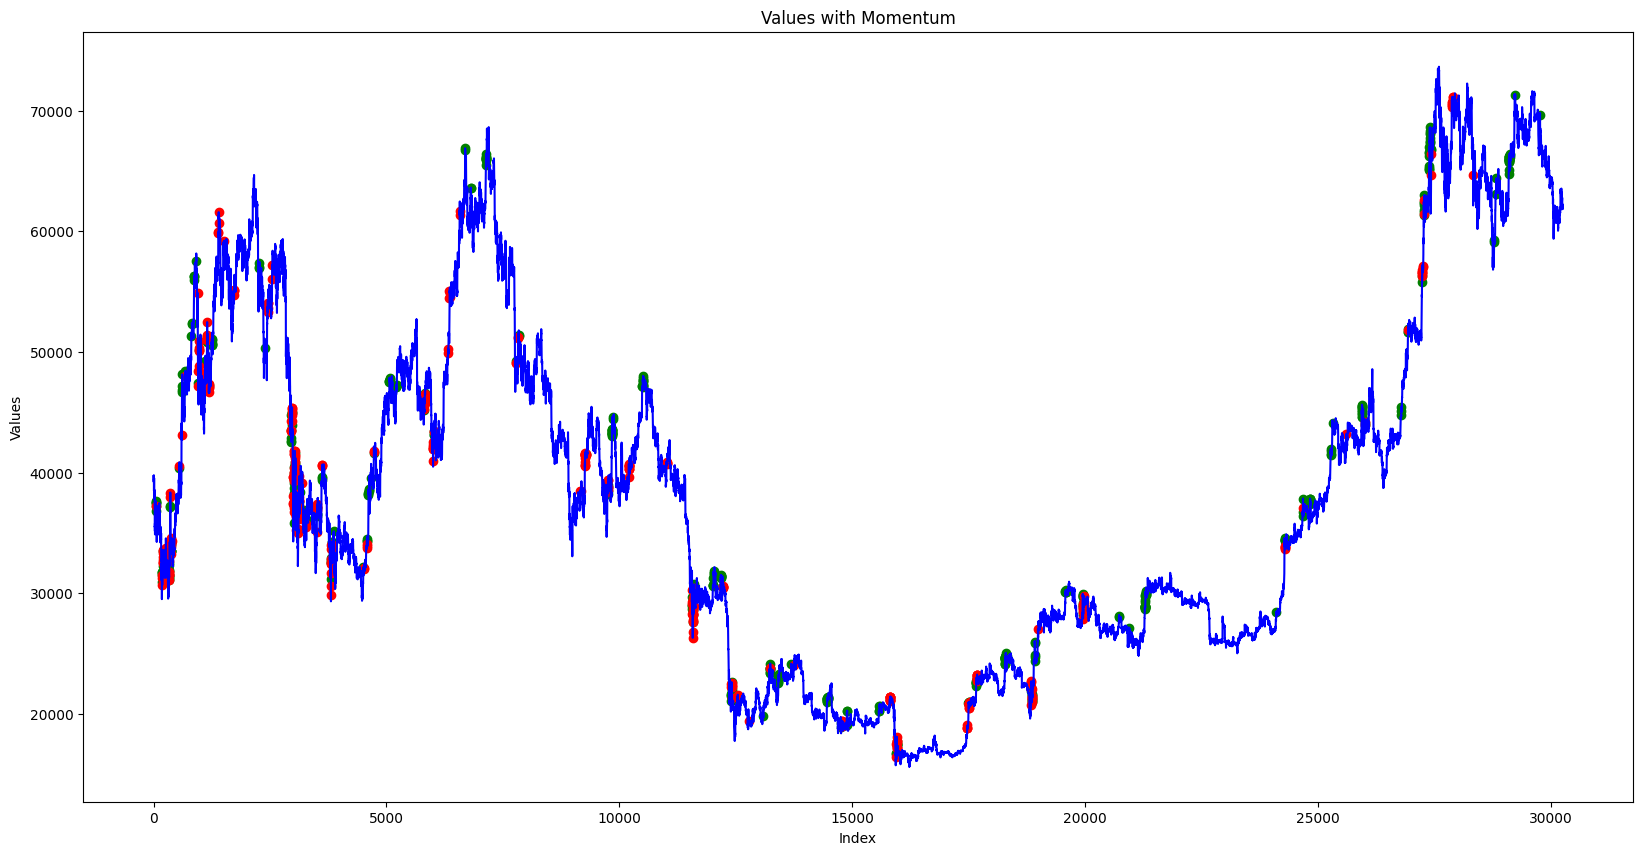

In [12]:
percent_gain = 20
plt.figure(figsize=(20,10))
plt.plot(full_df['Close'], label='Values', color='blue')
# Overlay uptrends in a different color
high_positive_momentum = momentum_score[momentum_score>percent_gain].index
plt.scatter(high_positive_momentum, full_df['Close'].loc[high_positive_momentum], color='green', label='Positive Momentum')

high_negative_momentum = momentum_score[momentum_score<(-percent_gain)].index
plt.scatter(high_negative_momentum, full_df['Close'].loc[high_negative_momentum], color='red', label='Negative Momentum')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Values with Momentum')